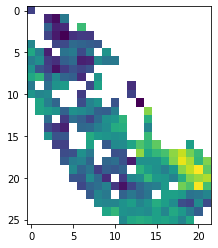

[[ 2.3532171          nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan]
 [        nan         nan  1.4176154   0.43924856  4.8706975          nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan]
 [        nan         nan  3.7985373   1.1857481   1.5077572          nan
   8.225234           nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan]
 [        nan         nan  2.4829876   0.90287113  0.02945757  1.8019693
   2.0820165   2.0210462          nan         nan         nan         nan
          nan         nan         

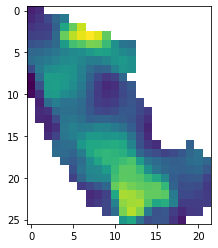

[[0.17115432 0.22678997        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan]
 [0.20217496 0.26923537 0.36856237 0.53975827 0.6666101         nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan]
 [0.26926345 0.3027532  0.31300542 0.50626445 0.940801   1.2085929
  1.4413625         nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan]
 [0.31905392 0.3336372  0.354405   0.5609533  1.2114512  1.4147937
  1.5125633  1.5718572  1.4942766  1.1936498         nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan

In [67]:
import rasterio
from rasterio.windows import Window
from rasterio.plot import show
import numpy as np
import matplotlib as plt

# takes in igram.tif that has been warped to v_m map using warptool, use qgis to mask
with rasterio.open('igram.tif') as src1:
    igram = src1.read(1)
igram[igram==0] = np.nan
igram = igram + 5
with rasterio.open('v_m_warp.tif') as src2:
    v_m_guess = src2.read(1,window=Window(0, 0, 22, 26))
v_m_guess[v_m_guess<0] = np.nan
#new stuff
v_m_guess = v_m_guess
show(igram)
print(igram)
show(v_m_guess)
print(v_m_guess)


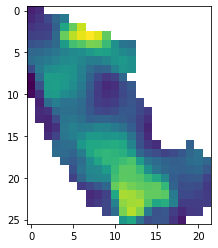

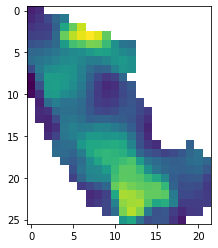

[[0.07502912 0.09941818        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan]
 [0.08862767 0.11802502 0.1615671  0.23661445 0.29222265        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan]
 [0.11803733 0.13271828 0.13721254 0.22193173 0.41242003 0.5298123
  0.63185173        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan]
 [0.13986403 0.14625692 0.15536092 0.24590576 0.5310652  0.62020475
  0.6630641  0.6890569  0.6550478  0.5232616         nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        na

In [68]:
slope = 11
incidence = 37
v_m_LOS = (v_m_guess*np.cos(np.deg2rad((90-incidence)+slope)))
show(v_m_LOS)
print(v_m_LOS)


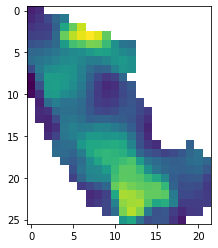

[[0.56359255 0.74679464        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan]
 [0.66574013 0.88656276 1.2136357  1.7773651  2.1950746         nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan]
 [0.88665515 0.99693334 1.0306927  1.6670736  3.0979552  3.9797647
  4.7462497         nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan]
 [1.0506097  1.0986309  1.167017   1.8471581  3.9891765  4.658761
  4.980706   5.175955   4.9204903  3.9305584         nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan]

In [69]:
wavelength = 0.055
t_years = 0.0328767
phase_contribution_due_to_v_in_LOS = (((4*np.pi)/wavelength)*v_m_LOS*t_years)
show(phase_contribution_due_to_v_in_LOS)
print(phase_contribution_due_to_v_in_LOS)

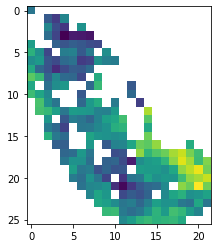

[[ 1.7896246          nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan]
 [        nan         nan  0.20397973 -1.3381165   2.675623           nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan]
 [        nan         nan  2.7678447  -0.4813255  -1.590198           nan
   3.4789844          nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan]
 [        nan         nan  1.3159707  -0.94428694 -3.959719   -2.8567917
  -2.8986897  -3.1549087          nan         nan         nan         nan
          nan         nan         

In [70]:
phase_contribution_due_to_snow = abs(igram)-abs(phase_contribution_due_to_v_in_LOS)
show(phase_contribution_due_to_snow)
print(phase_contribution_due_to_snow)

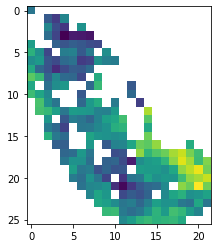

<AxesSubplot:>

In [71]:
delta_swe = (wavelength/(2*np.pi))*((phase_contribution_due_to_snow)/(1+(1.59+np.deg2rad(37)**(5/2))))
show(delta_swe)

In [72]:
delta_swe = delta_swe*100
print(delta_swe)

[[ 0.53555167         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan]
 [        nan         nan  0.06104168 -0.40043625  0.80068994         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan]
 [        nan         nan  0.82828766 -0.14403842 -0.47587258         nan
   1.0410987          nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan]
 [        nan         nan  0.39380902 -0.2825813  -1.1849604  -0.8549053
  -0.86744344 -0.9441179          nan         nan         nan         nan
          nan         nan         

In [53]:
# Register GDAL format drivers and configuration options with a
# context manager.
newsrc = rasterio.open("igram.tif")
with rasterio.Env():

    # Write an array as a raster band to a new 8-bit file. For
    # the new file's profile, we start with the profile of the source
    profile = newsrc.profile

    # And then change the band count to 1, set the
    # dtype to uint8, and specify LZW compression.
    profile.update(
        dtype=rasterio.float32,
        count=1,
        compress='lzw')

    with rasterio.open('delta_swe_map.tif', 'w', **profile) as dst:
        dst.write(delta_swe.astype(rasterio.float32),1)

# At the end of the ``with rasterio.Env()`` block, context
# manager exits and all drivers are de-registered.

CPLE_AppDefinedError: Deleting delta_swe_map.tif failed: Permission denied